<a href="https://colab.research.google.com/github/ReneeZhang2017/Heart-disease/blob/master/Heart_Disease_Renee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction
This is a classification practice homework. I performed Exploratory Data Anlysis on the Heart Diseases UCI and tried to identify relationship between diseases and various other festures. After EDA, I applied 3 different classification models (Logistic Regression, SVM and Random Forest) to make the predictions. At the end, I used different approaches (confusion matrix, precision, recall, ROC AUC) to access the model performance.

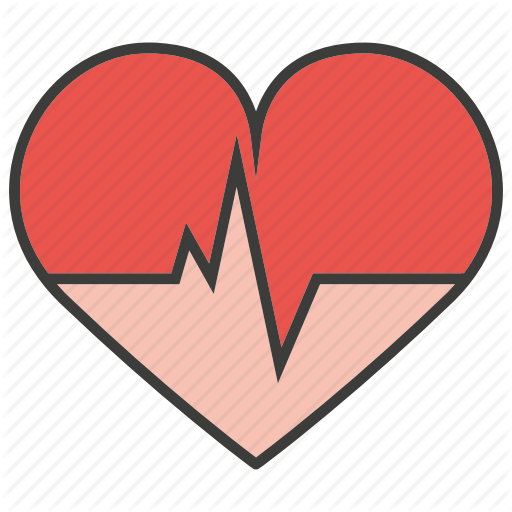

In [124]:
from IPython.display import Image, display
display(Image('heart signal.png',width=300, height=300))

# 2. Import Data

In [17]:
import numpy as np
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/ReneeZhang2017/Hear-Disease/master/heart%202.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
df.shape

(303, 14)

In [0]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [0]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# 3. EDA

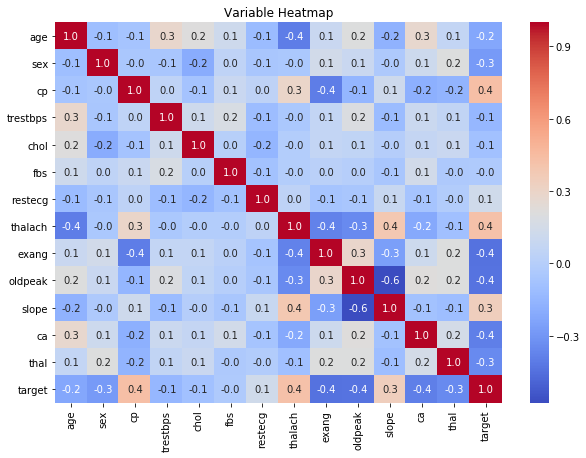

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,fmt='.1f',cmap='coolwarm')
plt.title('Variable Heatmap')
plt.show()

# 4. Model

### 4.1 Data Preparing

In [0]:
# Split the dependant and independant variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
# Splitting the data into Training set & Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 4.2 Modeling

### 4.2.1 LogisticRegression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log = LogisticRegression()
log.fit(X_train,y_train)
predict1 = log.predict(X_test)
AS1=accuracy_score(y_test,predict1)
print('Accuracy Score: ',AS1)

Accuracy Score:  0.8524590163934426


### 4.2.2 SVM

In [21]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
predict2 = clf.predict(X_test)
AS2=accuracy_score(y_test,predict2)
print('Accuracy Score: ',AS2)


Accuracy Score:  0.819672131147541


### 4.2.3 RandomForest

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=100)
rfc.fit(X_train, y_train)
predict3 = rfc.predict(X_test)
AS3=accuracy_score(y_test,predict3)
print('Accuracy Score: ',AS3)


Accuracy Score:  0.8852459016393442


### Model Summary

In [23]:
mss = [['LogisticRegression', AS1], ['SVM', AS2], ['RandomForest', AS3]]   
ms = pd.DataFrame(mss, columns = ['Model', 'Accuracy Score'])  
ms

,Model,Accuracy Score
0,LogisticRegression,0.852459
1,SVM,0.819672
2,RandomForest,0.885246


### 4.3 Apply GridSearchCV to find the best hyperparameters for your models

### 4.3.1 LogisticRegression

In [27]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)
predict = logreg_cv.predict(X_test)
ass1=accuracy_score(y_test,predict)
print('Accuracy Score: ',ass1)

Accuracy Score:  0.8524590163934426


### 4.3.2 SVM

In [29]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
svc_model = GridSearchCV(svc, parameters, cv=5)
svc_model.fit(X_train,y_train)
predict = svc_model.predict(X_test)
ass2=accuracy_score(y_test,predict)
print('Accuracy Score: ',ass2)

Accuracy Score:  0.819672131147541


### 4.3.3 RandomForest

In [30]:
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

rfc_model = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
rfc_model.fit(X_train, y_train)
predict = rfc_model.predict(X_test)
ass3=accuracy_score(y_test,predict)
print('Accuracy Score: ',ass3)

Accuracy Score:  0.8688524590163934


### Summary

In [31]:
mss = [['LogisticRegression', ass1], ['SVM', ass2], ['RandomForest', ass3]]   
ms = pd.DataFrame(mss, columns = ['Model', 'Accuracy Score'])  
ms

,Model,Accuracy Score
0,LogisticRegression,0.852459
1,SVM,0.819672
2,RandomForest,0.868852


# 5. Assess model performance (confusion matrix, precision, recall, ROC AUC) and interpret performance from business impact viewpoint (false negatives vs false positives).

###  A: Confusion Matrix
###  B: Precision
Precision is defined as the number of true positives divided by the number of true positives plus the number of false positives.

*Precision*: ability of a classification model to return only relevant instances
### C: Recall
The precise definition of recall is the number of true positives divided by the number of true positives plus the number of false negatives.

*Recall*: ability of a classification model to identify all relevant instances

### D. ROC AUC
ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

In [0]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score


### 5.1 Logistic Regression

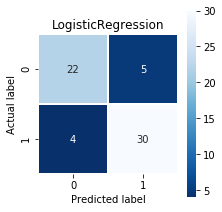

In [40]:
cm = metrics.confusion_matrix(y_test, predict1)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="g", linewidths=.5, square = True, cmap = 'Blues_r')
plt.tight_layout()
plt.title('LogisticRegression', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [41]:
results1 = confusion_matrix(y_test, predict1)
print('Confusion Matrix :')
print(results1)

precision1 = precision_score(y_test, predict1)
print('Precision_LogisticRegression: %f' % precision1)

recall1 = recall_score(y_test, predict1)
print('Recall_LogisticRegression: %f' % recall1)

auc1 = roc_auc_score(y_test, predict1)
print('ROC AUC_LogisticRegression: %f' % auc1)

Confusion Matrix :
[[22  5]
 [ 4 30]]
Precision_LogisticRegression: 0.857143
Recall_LogisticRegression: 0.882353
ROC AUC_LogisticRegression: 0.848584


### 5.2 SVM

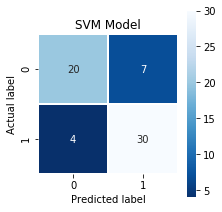

In [36]:
cm = metrics.confusion_matrix(y_test, predict2)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="g", linewidths=.5, square = True, cmap = 'Blues_r')
plt.tight_layout()
plt.title('SVM Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [42]:
results2 = confusion_matrix(y_test, predict2)
print('Confusion Matrix :')
print(results2)

precision2 = precision_score(y_test, predict2)
print('Precision_SVM: %f' % precision2)

recall2 = recall_score(y_test, predict2)
print('Recall_SVM: %f' % recall2)

auc2 = roc_auc_score(y_test, predict2)
print('ROC AUC_SVM: %f' % auc2)

Confusion Matrix :
[[20  7]
 [ 4 30]]
Precision_SVM: 0.810811
Recall_SVM: 0.882353
ROC AUC_SVM: 0.811547


### 5.3 RandomForest

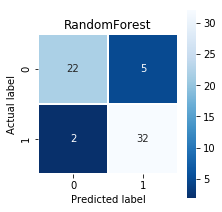

In [38]:
cm = metrics.confusion_matrix(y_test, predict3)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="g", linewidths=.5, square = True, cmap = 'Blues_r')
plt.tight_layout()
plt.title('RandomForest', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [43]:
results3 = confusion_matrix(y_test, predict3)
print('Confusion Matrix :')
print(results3) 

precision3 = precision_score(y_test, predict3)
print('Precision_RandomForest: %f' % precision3)

recall3 = recall_score(y_test, predict3)
print('Recall_Randomforest: %f' % recall3)

auc3 = roc_auc_score(y_test, predict3)
print('ROC AUC_RandomForest: %f' % auc3)

Confusion Matrix :
[[22  5]
 [ 2 32]]
Precision_RandomForest: 0.864865
Recall_Randomforest: 0.941176
ROC AUC_RandomForest: 0.877996


### Summary

In [44]:
mmss = [['LogisticRegression', precision1,recall1,auc1], ['SVM', precision2,recall2,auc2], ['RandomForest', precision3,recall3,auc3]]   
ms = pd.DataFrame(mmss, columns = ['Model', 'Precision','Recall','AUC'])  
ms

,Model,Precision,Recall,AUC
0,LogisticRegression,0.857143,0.882353,0.848584
1,SVM,0.810811,0.882353,0.811547
2,RandomForest,0.864865,0.941176,0.877996


**Interpretation**

Precision：Precision is the number of document retrieved that are relevant (tp / (tp + fp))

Recall：Recall is the number of relevant document that are retrieved (tp / (tp + fn))

Two Types of Error:

In statistical hypothesis testing a type I error is the acceptance of a false hypothesis (also known as a "false positive" finding or conclusion), while a type II error is the rejection of a true hypothesis (also known as a "false negative" finding or conclusion).

AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve: also called "AUROC (Area Under the Receiver Operating Characteristics)"

ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at distinguishing between patients with disease and no disease

Among all of the index, Precision is a more essential index to this problem. Because for the illness diagonosis problem, type I error is much severe than type II error. The larger the Precision is, the better model is.

Therefore, we should choose LogisticRegression model.

# 6 .Apply AutoML (Auto sklearn) to build classification model and compare model performance

In [5]:
!apt-get install default-jre
!java -version

!pip install -q h2o

import h2o
from h2o.automl import H2OAutoML

h2o.init()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
openjdk version "11.0.2" 2019-01-15
OpenJDK Runtime Environment (build 11.0.2+9-Ubuntu-3ubuntu118.04.3)
OpenJDK 64-Bit Server VM (build 11.0.2+9-Ubuntu-3ubuntu118.04.3, mixed mode, sharing)
Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,43 mins 02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.2
H2O cluster version age:,16 days
H2O cluster name:,H2O_from_python_unknownUser_fnw7xo
H2O cluster total nodes:,1
H2O cluster free memory:,2.992 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"locked, healthy"


In [11]:
df=pd.read_csv('https://raw.githubusercontent.com/ReneeZhang2017/Hear-Disease/master/heart%202.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
df = h2o.H2OFrame(df)
train, valid, test = df.split_frame(ratios=[0.6,0.2], seed=1234)
response = "target"
train[response] = train[response].asfactor()
valid[response] = valid[response].asfactor()
test[response] = test[response].asfactor()
print("Number of rows in train, valid and test set : ", train.shape[0], valid.shape[0], test.shape[0])

Parse progress: |█████████████████████████████████████████████████████████| 100%
Number of rows in train, valid and test set :  185 56 62


In [13]:
predictors = df.columns[:-1]
aml = H2OAutoML(max_models = 10, max_runtime_secs=100, seed = 1)
aml.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [14]:
lb = aml.leaderboard
lb

model_id,auc,logloss,mean_per_class_error,rmse,mse
XGBoost_1_AutoML_20190503_024124,0.900714,0.405645,0.180357,0.357718,0.127962
XGBoost_3_AutoML_20190503_024124,0.89619,0.418791,0.172321,0.360944,0.13028
GLM_grid_1_AutoML_20190503_024124_model_1,0.885357,0.424541,0.183929,0.370201,0.137049
GBM_2_AutoML_20190503_024124,0.884524,0.420397,0.194345,0.36822,0.135586
GBM_4_AutoML_20190503_024124,0.88369,0.422709,0.183631,0.369373,0.136436
GBM_3_AutoML_20190503_024124,0.882381,0.425424,0.183631,0.370959,0.13761
StackedEnsemble_BestOfFamily_AutoML_20190503_024124,0.880833,0.42307,0.172917,0.366052,0.133994
StackedEnsemble_AllModels_AutoML_20190503_024124,0.880357,0.423581,0.184821,0.365327,0.133464
GBM_1_AutoML_20190503_024124,0.876429,0.454258,0.180655,0.379555,0.144062
XGBoost_2_AutoML_20190503_024124,0.87625,0.525554,0.160417,0.413195,0.17073


**Summary:**

From the leaderboard, we can found that XGBoost has the best performance, since it has the highest AUC score: 0.900714

# 7. Conclusion